<center><span style="font-family:Comic Sans MS; color:navy "><h1>Cirrhosis Outcomes Predictions(EDA,LGBMClassifiers ,84% Accuracy)</h1></span></center>

# <b>a <span style='color:#94D4F6'>|</span> Table of Conents</b>
<a id="toc"></a>
- [1. Import Libraries](#1)
- [2. Read Dataset](#2)
- [3. Visualization](#3)
- [4. Preprocessing](#4)
- [6. Split Dataset](#6)
- [7. Modeling](#7)
- [9. Evaluation](#8) 
- [8. Predict test data](#9)

# <b>b <span style='color:#94D4F6'>|</span> About DataSet</b>

<div class="alert alert-block alert-info" style="font-size:17px; background-color: #EEEFFF; font-family:Comic Sans MS; color: #00011A; border: 1px #00011A">
Cirrhosis results from prolonged liver damage, leading to extensive scarring, often due to conditions like hepatitis or chronic alcohol consumption. This competition is required a machine learning method to predict survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).

<a id="1"></a>
# <b>1 <span style='color:#94D4F6'>|</span> Import Libraries</b>

In [79]:
import numpy as np
import pandas as pd

# for EDA
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

# for Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import(
    train_test_split,# used to split the data into training and testing
    RandomizedSearchCV,# used for tuning the models parameters
    cross_val_score,
)

# Modeling
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# For Evaluation 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

<a id="2"></a>
# <b>2 <span style='color:#94D4F6'>|</span> Read Dataset</b>

In [80]:
df = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')
sample_submission = pd.read_csv('Data/sample_submission.csv')
original_data = pd.read_csv('Data/cirrhosis.csv')
testCopy = test.copy() 

In [81]:
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [82]:
original_data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

<div class="alert alert-block alert-info" style="font-size:17px; background-color: #EEEFFF; font-family:Comic Sans MS; color: #00011A; border: 1px #00011A">
As you can see, our dataset does not contain any null values. However, there are some categorical variables present. We need to perform preprocessing operations on these variables to transform them into suitable inputs for our modeling step.

### Shape

In [84]:
print('shape of the training dataset:')
print('There are {} rows and {} columns in the train dataset.'.format(df.shape[0], df.shape[1]))
print('shape of the original dataset:')
print('There are {} rows and {} columns in the original dataset.'.format(original_data.shape[0], original_data.shape[1]))
print('shape of the test dataset:')
print('There are {} rows and {} columns in the test dataset.'.format(test.shape[0], test.shape[1]))

shape of the training dataset:
There are 7905 rows and 20 columns in the train dataset.
shape of the original dataset:
There are 418 rows and 20 columns in the original dataset.
shape of the test dataset:
There are 5271 rows and 19 columns in the test dataset.


### Describe the dataset

In [85]:
df.describe().style.background_gradient(cmap ='summer')

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


<div class="alert alert-block alert-info" style="font-size:17px; background-color: #EEEFFF; font-family:Comic Sans MS; color: #00011A; border: 1px #00011A">
And here is some statistical information about our dataset. I will create clear plots to present the data more effectively.

### Columns

In [86]:
df.columns

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status'],
      dtype='object')

### Drop unnecessary columns

In [87]:
df.drop('id',axis=1,inplace=True)
original_data.drop('ID',axis = 1, inplace = True)
original_data = original_data.dropna()
test.drop('id',axis = 1,inplace =True)

### Determine the Categorical and Numerical Features

In [88]:
target = 'Status'
obj_col = [x for x in df.select_dtypes(include=['object']).columns if x!=target]
num_col = [x for x in df.select_dtypes(exclude =['object']).columns if x!= target]
print(f'obj_columns: {obj_col}')
print(f'num_columns: {num_col}')

obj_columns: ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
num_columns: ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


<a id="3"></a>
# <b>3 <span style='color:#94D4F6'>|</span> Explanatory Data Analysis (EDA)</b>
<div class="alert alert-block alert-info" style="font-size:17px; background-color: #EEEFFF; font-family:Comic Sans MS; color: #00011A; border: 1px #00011A">

<font size="3">Let's see what's the quality of raw dataset.</font>

In [89]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum()
    sum['missing%'] = (df.isna().sum())/len(df)
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values
    return sum
summary(df).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,uniques,count
N_Days,int64,0,0.000000,461,7905
Drug,object,0,0.000000,2,7905
Age,int64,0,0.000000,391,7905
Sex,object,0,0.000000,2,7905
Ascites,object,0,0.000000,2,7905
Hepatomegaly,object,0,0.000000,2,7905
Spiders,object,0,0.000000,2,7905
Edema,object,0,0.000000,3,7905
Bilirubin,float64,0,0.000000,111,7905
Cholesterol,float64,0,0.000000,226,7905


In [90]:
print('----------test data ------------')
summary(test).style.background_gradient(cmap='Blues')

----------test data ------------


,dtypes,missing#,missing%,uniques,count
N_Days,int64,0,0.000000,409,5271
Drug,object,0,0.000000,2,5271
Age,int64,0,0.000000,363,5271
Sex,object,0,0.000000,2,5271
Ascites,object,0,0.000000,2,5271
Hepatomegaly,object,0,0.000000,2,5271
Spiders,object,0,0.000000,2,5271
Edema,object,0,0.000000,3,5271
Bilirubin,float64,0,0.000000,108,5271
Cholesterol,float64,0,0.000000,222,5271


### Label Distribution

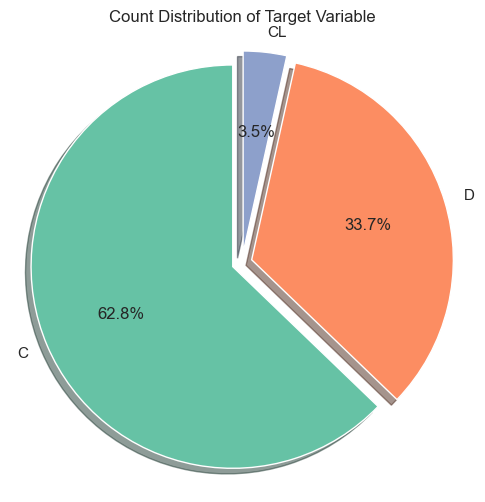

In [91]:
counts = df['Status'].value_counts()
df_counts = pd.DataFrame({'Class': counts.index, 'Count': counts.values})
# Sort the DataFrame by count in descending order
df_counts = df_counts.sort_values('Count', ascending=False)
sns.set_palette("Set2")
plt.figure(figsize=(6, 6))
plt.pie(df_counts['Count'], labels=df_counts['Class'], autopct='%1.1f%%',explode=(0.05,0.05,0.05), shadow=True, startangle=90, colors=sns.color_palette())
plt.title('Count Distribution of Target Variable')
plt.axis('equal')
plt.show()

In [92]:
feat_distribution = ['N_Days',
                     'Age',
                     'Bilirubin',
                     'Cholesterol',
                     'Albumin',
                     'Copper',
                     'Alk_Phos',
                     'SGOT',
                     'Tryglicerides',
                     'Platelets',
                     'Prothrombin',
                     'Stage']

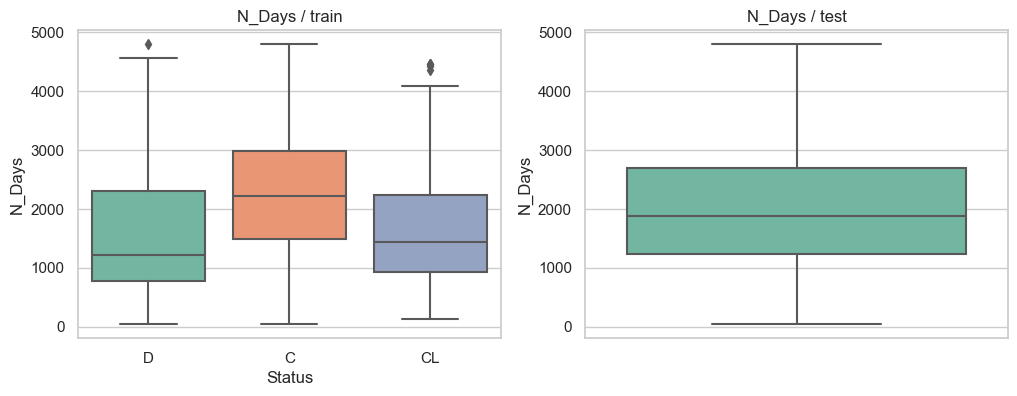

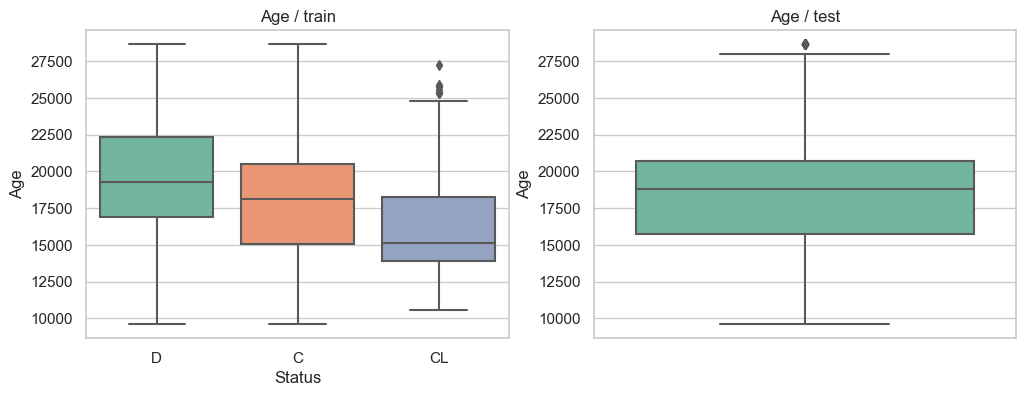

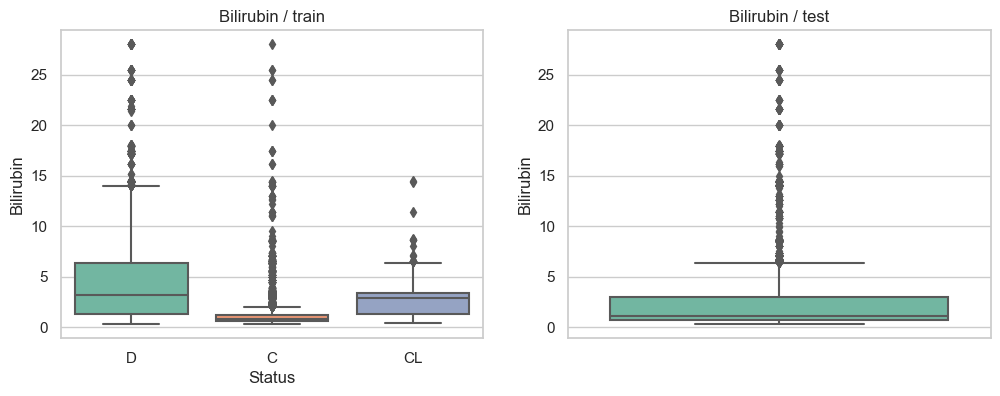

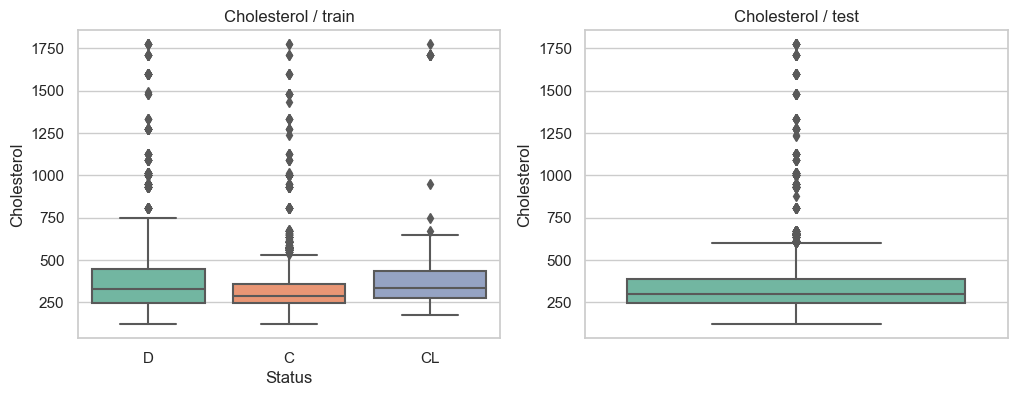

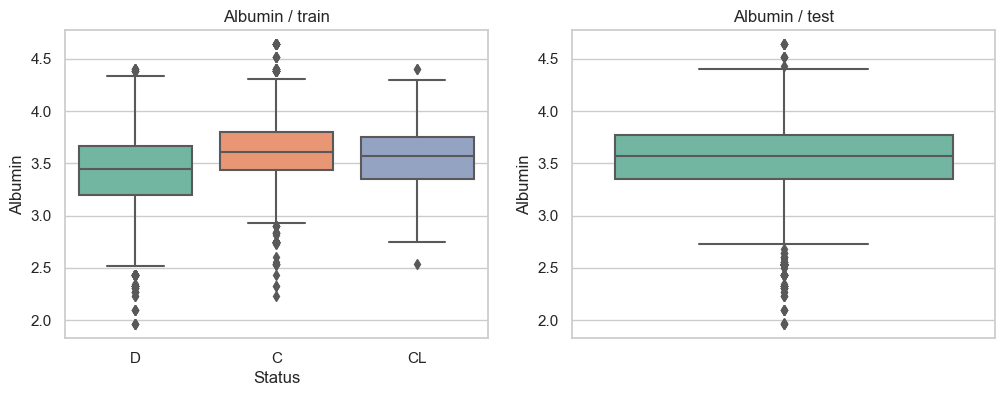

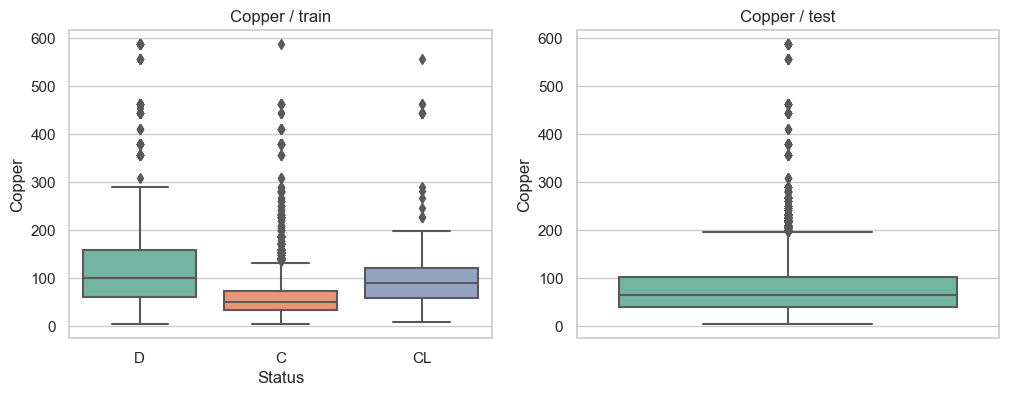

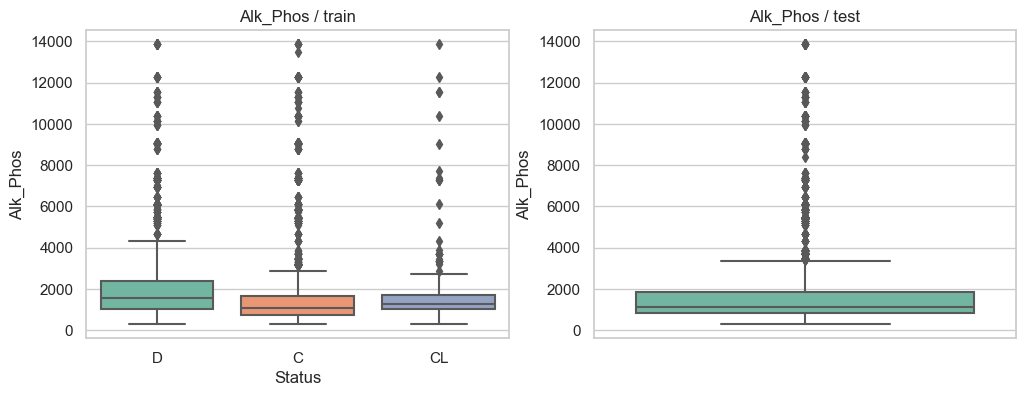

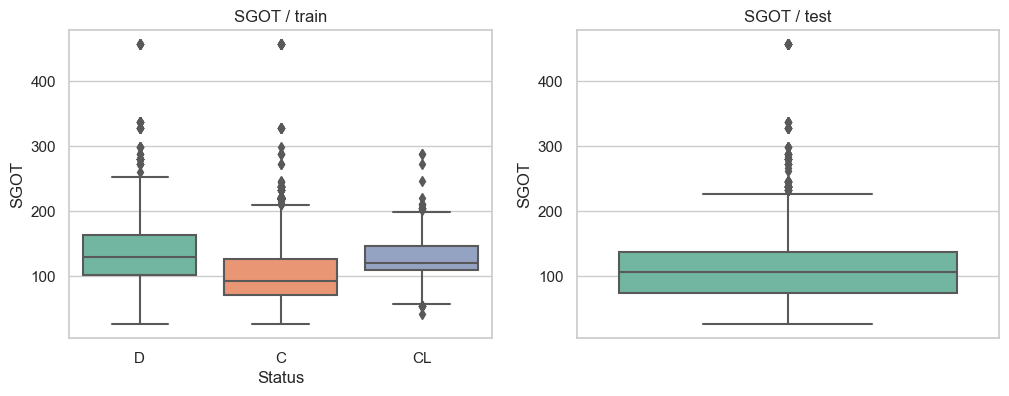

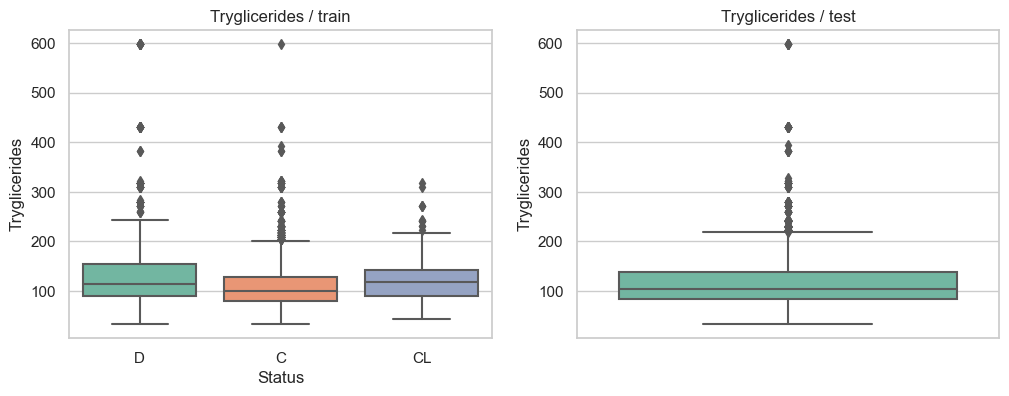

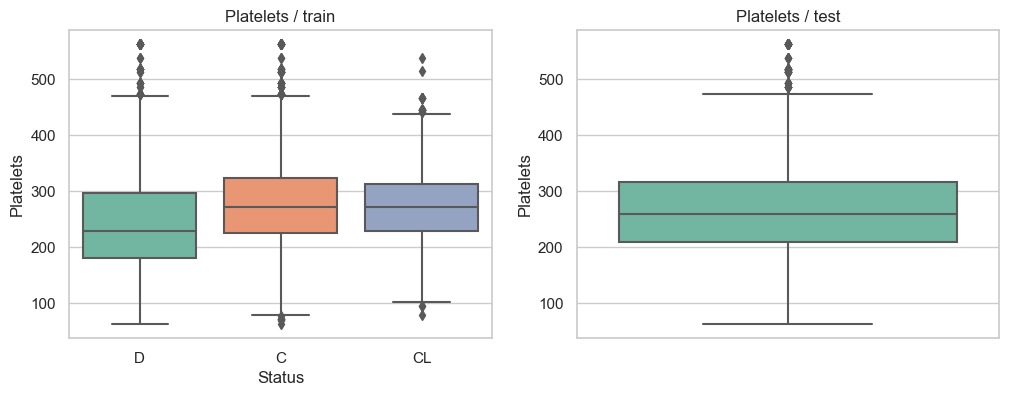

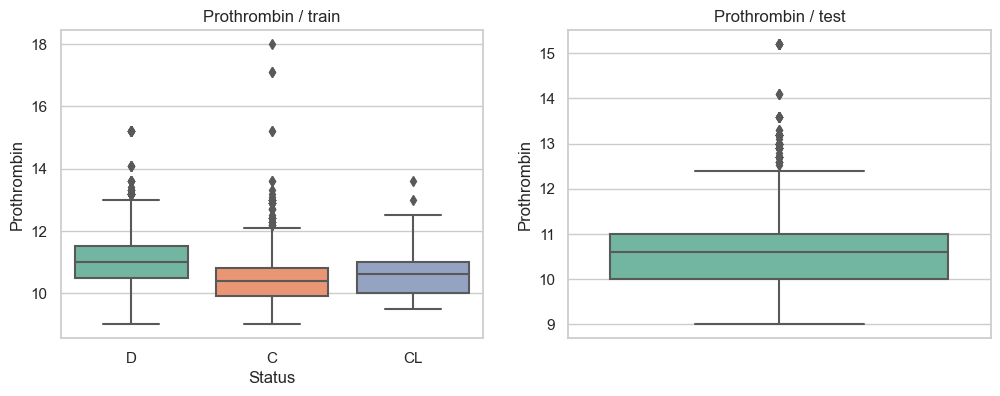

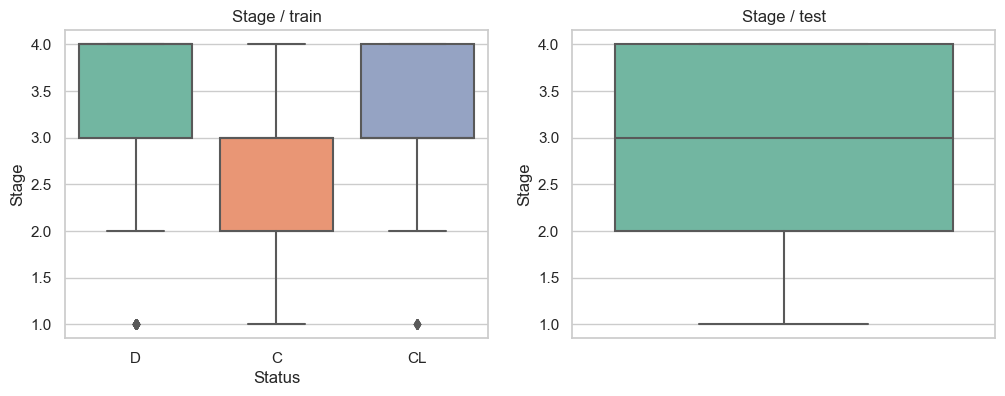

In [93]:
for feat in feat_distribution:
    plt.figure(figsize=(12,4))
    ax1 = plt.subplot(1,2,1)
    sns.boxplot(data=df, x='Status', y=feat)#x='Status', 
    plt.title(feat + ' / train')
    x1 = plt.subplot(1,2,2)
    sns.boxplot(data=test, y=feat)
    plt.title(feat + ' / test')
    plt.show()

<a id="4"></a>
# <b>4 <span style='color:#94D4F6'>|</span> Preprocessing</b>

### Encode Categorical Variables to Numerical

In [94]:
le = LabelEncoder()
for col in obj_col:
    df[col] = le.fit_transform(df[col])
    test[col] = le.fit_transform(test[col])
# Encode Target Variable
df[target] = df[target].map({'C':0, 'CL':1, 'D':2})

In [95]:
df.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,0,21532,1,0,0,0,0,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,2
1,2574,1,19237,0,0,0,0,0,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,0
2,3428,1,13727,0,0,1,1,2,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,2
3,2576,1,18460,0,0,0,0,0,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,0
4,788,1,16658,0,0,1,0,0,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,0


In [96]:
xgb_params = {'lambda': 1.1369029459700144e-06, 'alpha': 0.012063715109367643, 'max_depth': 6, 'eta': 0.0016842485569386354, 'gamma': 1.8110005586084708e-08, 'colsample_bytree': 0.14198953405080517, 'subsample': 0.7387879239640978, 'min_child_weight': 1, 'n_estimators': 931, 'learning_rate': 0.07244128492444549, 'reg_alpha': 0.7206512712096103, 'reg_lambda': 0.33555254247327354}

In [97]:
# Separate the features from the target variable
X = df.drop('Status', axis=1)
y = df['Status'].astype('int')

<a id="6"></a>
## Spliting The Dataset to Train and Test

In [98]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<a id="7"></a>
# <b>4 <span style='color:#94D4F6'>|</span> Modeling</b>

In [99]:
init_models = {
    # 'support vector kernel' : SVR(kernel= 'rbf'),
    # 'XGBOOST':XGBRegressor(),
    # 'Decision Tree' : DecisionTreeRegressor(),
    # 'Random Forest' : RandomForestRegressor(),
    # 'LGBM' : LGBMRegressor(),
    'lgbmC' : LGBMClassifier(),
    'xgb' : XGBClassifier(),
}

In [100]:
R2 = []
models_names = []
for i,(key,model) in enumerate(init_models.items()):
    model.fit(X_train,y_train)
    models_names.append(key)
    R2.append(np.mean(cross_val_score(model,X_train,y_train,cv=5)))
models_scores = pd.DataFrame({'model name':models_names,'R2 score':R2})
models_scores.head(6)

,model name,R2 score
0,lgbmC,0.827799
1,xgb,0.822107


In [ ]:
fig, ax = plt.subplots()
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
ax.set_title("models R2 score")
sns.barplot(data=models_scores, x='model name', y="R2 score")
plt.show()

In [ ]:
XGBMC = XGBClassifier()
XGBMC.fit(X_train, y_train)

In [ ]:
# Make predictions on the test data
y_pred = XGBMC.predict(X_test)

In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

<a id="8"></a>
# <b>5 <span style='color:#94D4F6'>|</span> Evaluation</b>

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
def plot_confusion_matrix(confusion_matrix, classes):

    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, format(confusion_matrix[i, j], fmt),
                     ha="center", va="center",
                     color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    # Show the plot
    plt.show()

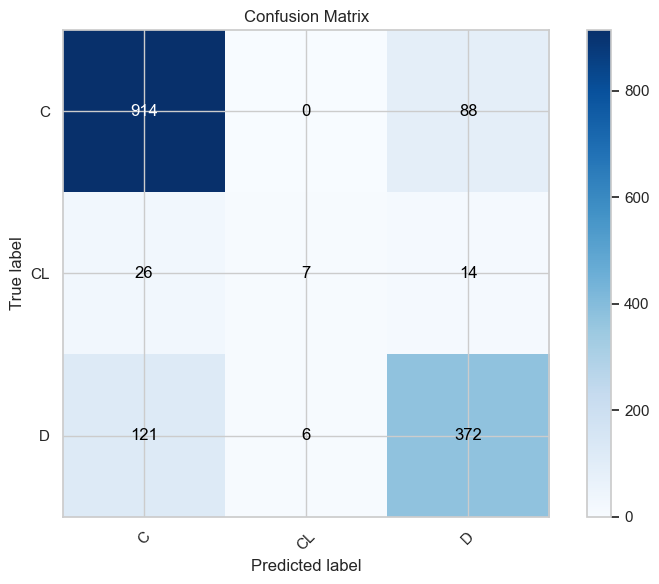

In [71]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=['C','CL','D'])
plt.show()

<a id="9"></a>
# <b>6 <span style='color:#94D4F6'>|</span> Prediction</b>

In [72]:
lgbmC.fit(X,y)

LGBMClassifier()

Here, I utilized the complete dataset to train my final model.

In [73]:
id = testCopy['id']
predict = lgbmC.predict_proba(test)

In [74]:
predict

array([[5.20614403e-01, 3.68268305e-02, 4.42558766e-01],
       [7.38447130e-01, 6.86452874e-02, 1.92907583e-01],
       [2.12445580e-02, 1.59482110e-03, 9.77160621e-01],
       ...,
       [8.99730054e-01, 3.19669454e-03, 9.70732513e-02],
       [9.92805993e-01, 8.38141907e-04, 6.35586542e-03],
       [1.81953994e-01, 4.74052994e-03, 8.13305476e-01]])

In [75]:
sample_submission.head()

,id,Status_C,Status_CL,Status_D
0,7905,0.520614,0.036827,0.442559
1,7906,0.738447,0.068645,0.192908
2,7907,0.021245,0.001595,0.977161
3,7908,0.976221,0.002083,0.021696
4,7909,0.833789,0.024339,0.141872


In [76]:
sample_submission.Status_C = predict[:, 0]
sample_submission.Status_CL = predict[:, 1]
sample_submission.Status_D = predict[:, 2]
sample_submission.head()

,id,Status_C,Status_CL,Status_D
0,7905,0.520614,0.036827,0.442559
1,7906,0.738447,0.068645,0.192908
2,7907,0.021245,0.001595,0.977161
3,7908,0.976221,0.002083,0.021696
4,7909,0.833789,0.024339,0.141872


In [77]:
# write to a file
sample_submission.to_csv('./submission.csv', index=False)

<center>
<span style="font-family:Comic Sans MS; color:red"><h2>Thank You😊</h2></span>
</center>